In [60]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline

In [61]:
#load dataset tips
df = sns.load_dataset('tips')
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [62]:
df.describe()

,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


# Question 1: 
Overall average tip

In [63]:
print('average tip = ',df['tip'].mean())

average tip =  2.9982786885245902


# Question no 2: 


In [64]:
df['tip'].describe()

count    244.000000
mean       2.998279
std        1.383638
min        1.000000
25%        2.000000
50%        2.900000
75%        3.562500
max       10.000000
Name: tip, dtype: float64

In [65]:
df['tip'].median()

2.9

Here, mean and median are same.This means distribution of this data has zero skewness.

# Question 3:
Box plot on tip values from tips dataset.


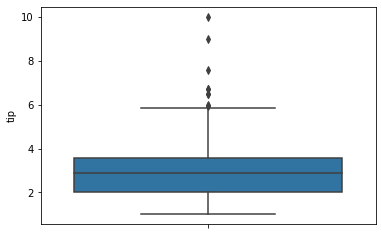

In [66]:
sns.boxplot(df['tip'], orient='v')

In [67]:
q3, q1 = np.percentile(df.tip, [75,25])

iqr = q3 - q1
iqr = round(iqr,2)

print ("Lower Quatile:- ", q1 )
print ("Lower Quatile:- ", q3 )
print ("IQR:- ", iqr )
l = q1 - (1.5*iqr)
u = q1 + (1.5*iqr)
l = round(l,2)
u = round(u,2)
print("Lower range in boxplot is {}, & the upper range is, {}".format(l,u))

Lower Quatile:-  2.0
Lower Quatile:-  3.5624999999999996
IQR:-  1.56
Lower range in boxplot is -0.34, & the upper range is, 4.34


yes, there are some outliers, as seen people giving more than 4.34 dollars tips are basically the outliers.


# Question 4
Box plot for total_bill collumn.  
yes, there are some outliers where bill amount is more than 40 dollars

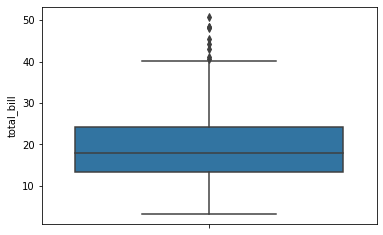

In [68]:
sns.boxplot(df['total_bill'], orient='v');

In [69]:
q3, q1 = np.percentile(df.total_bill, [75,25])

iqr = q3 - q1
iqr = round(iqr,2)

print ("Lower Quatile:- ", q1 )
print ("Lower Quatile:- ", q3 )
print ("IQR:- ", iqr )
l = q1 - (1.5*iqr)
u = q1 + (1.5*iqr)
l = round(l,2)
u = round(u,2)
print("Lower range in boxplot is {}, & the upper range is, {}".format(l,u))

Lower Quatile:-  13.3475
Lower Quatile:-  24.127499999999998
IQR:-  10.78
Lower range in boxplot is -2.82, & the upper range is, 29.52


# Question 5:
Percentage of females in data.

In [70]:
x = df['sex'].value_counts()
f = (x.Female/x.sum())*100
print("Percent of females in data:",f)

Percent of females in data: 35.65573770491803


# Question 6

In [71]:
cnt = df.groupby(['sex']).count().reset_index()
cnt

,sex,total_bill,tip,smoker,day,time,size
0,Male,157,157,157,157,157,157
1,Female,87,87,87,87,87,87


In [72]:
cnt['count_perc'] = (cnt['total_bill']/ len(df)) *100
cnt

,sex,total_bill,tip,smoker,day,time,size,count_perc
0,Male,157,157,157,157,157,157,64.344262
1,Female,87,87,87,87,87,87,35.655738


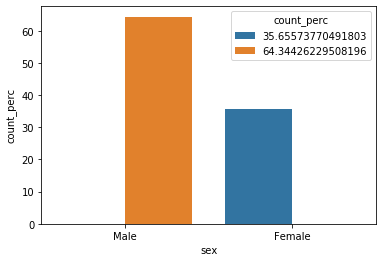

In [73]:
sns.barplot(x="sex",y='count_perc',
            hue = 'count_perc'
            ,data = cnt)

# Question 7:
Males gives slightly more tip than females.

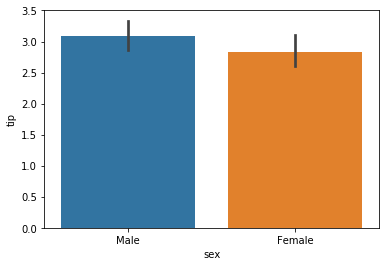

In [74]:
sns.barplot(x = 'sex', y ='tip', data =df);

In [75]:
df.groupby(["sex"]).mean()['tip']

sex
Male      3.089618
Female    2.833448
Name: tip, dtype: float64

# Question 8:

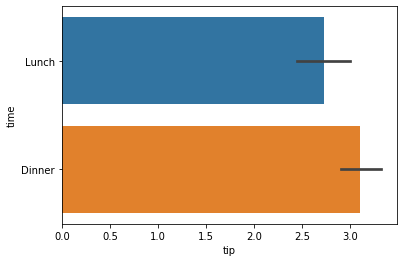

In [76]:
sns.barplot(x='tip',y='time', data=df);

# Question 9:

In [78]:
df.groupby('size').mean()['tip']

size
1    1.437500
2    2.582308
3    3.393158
4    4.135405
5    4.028000
6    5.225000
Name: tip, dtype: float64

# Question 10:

In [80]:
df.groupby('smoker').sum()['tip']

smoker
Yes    279.81
No     451.77
Name: tip, dtype: float64

# Question 11:
Gender vs. smoker/non-smoker and tip size - create a 2 by 2 and get the average tip size. Which group tips the most?


In [82]:
df.groupby(['sex','smoker']).mean()['tip']

sex     smoker
Male    Yes       3.051167
        No        3.113402
Female  Yes       2.931515
        No        2.773519
Name: tip, dtype: float64

# Question 12
Create a new metric called 'pct_tip' = tip/ total_bill - this would be percent tip give, and should be a better measure of the tipping behaviour.


In [93]:
df['pct_tip'] = df['tip']/df['total_bill']
df.head()

,total_bill,tip,sex,smoker,day,time,size,pct_tip
0,16.99,1.01,Female,No,Sun,Dinner,2,0.059447
1,10.34,1.66,Male,No,Sun,Dinner,3,0.160542
2,21.01,3.50,Male,No,Sun,Dinner,3,0.166587
3,23.68,3.31,Male,No,Sun,Dinner,2,0.139780
4,24.59,3.61,Female,No,Sun,Dinner,4,0.146808


# Question 13
 Does pct_tip differ by gender? Does one gender tip more than the other?

In [95]:
df.groupby(["sex"]).sum()['pct_tip']

sex
Male      24.751136
Female    14.484694
Name: pct_tip, dtype: float64

In [97]:
df.groupby(["size"]).sum()['pct_tip']

size
1     0.869168
2    25.852194
3     5.781960
4     5.400113
5     0.707477
6     0.624917
Name: pct_tip, dtype: float64

In [99]:
df['sex'].groupby(df["smoker"]).value_counts(normalize=True).rename('pct_tip').reset_index()

,smoker,sex,pct_tip
0,Yes,Male,0.645161
1,Yes,Female,0.354839
2,No,Male,0.642384
3,No,Female,0.357616


# Question 16:


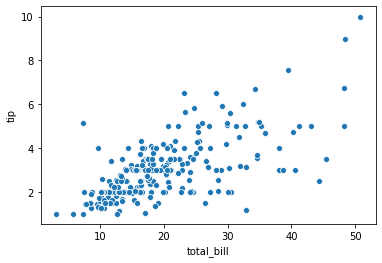

In [83]:
sns.scatterplot(x=df.total_bill, y=df.tip)

# Question 12

In [84]:
pct_tip = df.tip/df.total_bill
pct_tip.sum()

39.235829940291154

# Question 17:

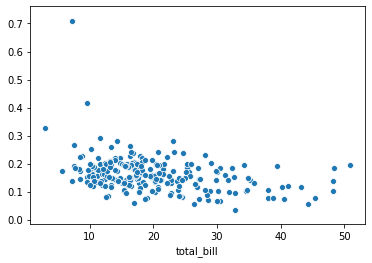

In [85]:
sns.scatterplot(x=df.total_bill, y=pct_tip)